# Loading Data

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
# Import di librerie per l'analisi e la visualizzazione dei dati
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing, model_selection

# Caricamento dei dati
filename = '/content/drive/MyDrive/Colab Notebooks/ISBI/Esercizio1/temp_humid_data.xlsx'

df_2022 = pd.read_excel(filename, sheet_name=0)
df_2023 = pd.read_excel(filename, sheet_name=1)

print('Dati anno 2022\n', df_2022.head(), end='\n\n')
print('Dati anno 2023\n', df_2023.head())

Dati anno 2022
          time  temperature_mean  relativehumidity_mean
0  2022-01-01             11.22                     77
1  2022-01-02              9.87                     86
2  2022-01-03              9.33                     79
3  2022-01-04             11.05                     72
4  2022-01-05             10.17                     73

Dati anno 2023
         Date  no. of Adult males  temperature_mean  relativehumidity_mean
0 2023-06-15                   1             24.62                     45
1 2023-06-16                   1             26.79                     46
2 2023-06-17                   0             26.02                     53
3 2023-06-18                   1             25.04                     48
4 2023-06-19                   0             25.09                     43


In [28]:
# Visualizzazione di alcune statistiche dei dati
print('Dati anno 2022\n', df_2022.describe(), end='\n\n')
print('Dati anno 2023\n', df_2023.describe())

Dati anno 2022
        temperature_mean  relativehumidity_mean
count        365.000000             365.000000
mean          16.038740              61.249315
std            7.965726              15.660750
min            1.330000              26.000000
25%            9.150000              50.000000
50%           15.410000              61.000000
75%           23.410000              72.000000
max           32.410000              94.000000

Dati anno 2023
        no. of Adult males  temperature_mean  relativehumidity_mean
count          106.000000        106.000000             106.000000
mean             0.415094         25.015566              50.283019
std              1.120101          3.768792              11.928162
min              0.000000         14.030000              26.000000
25%              0.000000         23.700000              41.250000
50%              0.000000         25.640000              51.500000
75%              0.000000         27.297500              58.000000
max     

# Data visualization

<Axes: title={'center': "Distribuzione dell'umidità nell'anno 2023"}, ylabel='Frequency'>

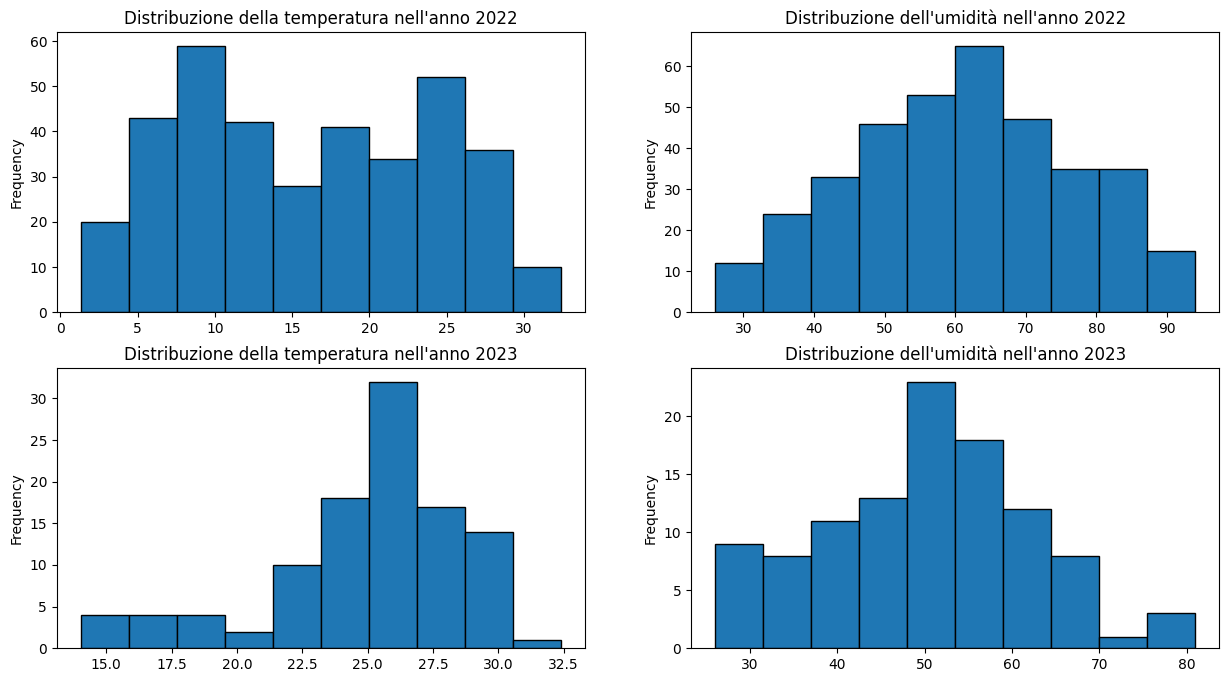

In [29]:
# Plot delle distribuzioni dei dati
plt.figure(figsize=(15, 8))

plt.subplot(221)
df_2022['temperature_mean'].plot(kind='hist', edgecolor='black', title='Distribuzione della temperatura nell\'anno 2022', xlabel='Temperatura (°C)')

plt.subplot(222)
df_2022['relativehumidity_mean'].plot(kind='hist', edgecolor='black', title='Distribuzione dell\'umidità nell\'anno 2022')

plt.subplot(223)
df_2023['temperature_mean'].plot(kind='hist', edgecolor='black', title='Distribuzione della temperatura nell\'anno 2023')

plt.subplot(224)
df_2023['relativehumidity_mean'].plot(kind='hist', edgecolor='black', title='Distribuzione dell\'umidità nell\'anno 2023')

([<matplotlib.axis.XTick at 0x7a03bb73fd00>,
 [Text(19523.0, 0, '2023-06-15'),
  Text(19553.0, 0, '2023-07-15'),
  Text(19583.0, 0, '2023-08-14'),
  Text(19613.0, 0, '2023-09-13')])

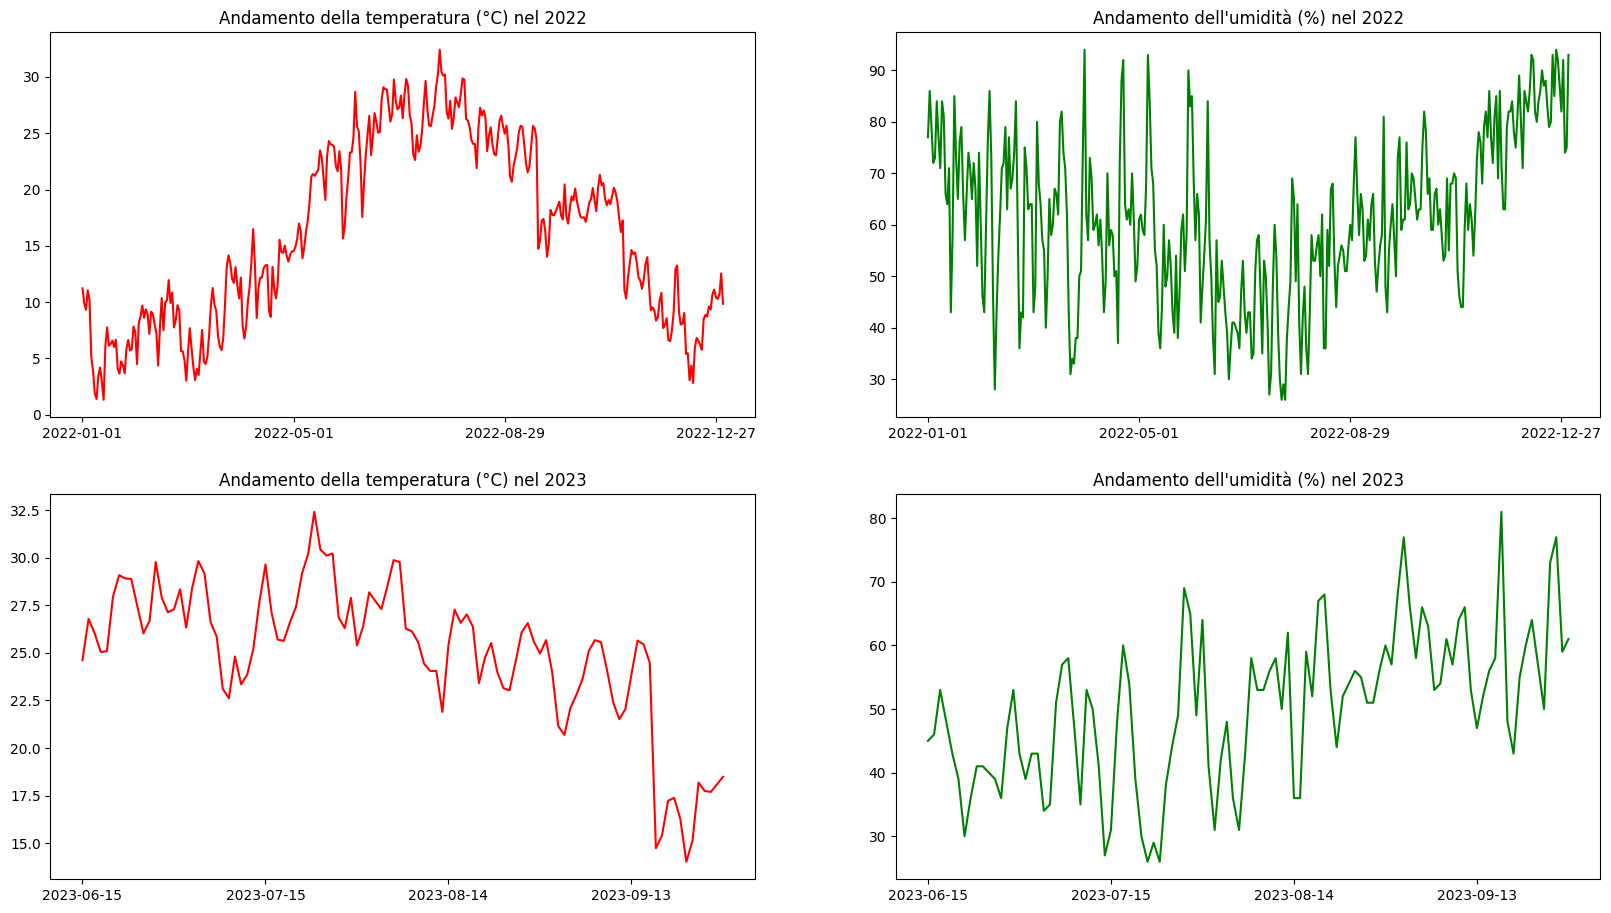

In [30]:
# Plot degli andamenti dei dati
plt.figure(figsize=(20, 11))

plt.subplot(221)
plt.plot(df_2022['time'], df_2022['temperature_mean'], color='r')
plt.title('Andamento della temperatura (°C) nel 2022')
plt.xticks(df_2022['time'][::120])

plt.subplot(222)
plt.plot(df_2022['time'], df_2022['relativehumidity_mean'], color='g')
plt.title('Andamento dell\'umidità (%) nel 2022')
plt.xticks(df_2022['time'][::120])

plt.subplot(223)
plt.plot(df_2023['Date'], df_2023['temperature_mean'], color='r')
plt.title('Andamento della temperatura (°C) nel 2023')
plt.xticks(df_2023['Date'][::30])

plt.subplot(224)
plt.plot(df_2023['Date'], df_2023['relativehumidity_mean'], color='g')
plt.title('Andamento dell\'umidità (%) nel 2023')
plt.xticks(df_2023['Date'][::30])

Text(0.5, 1.0, 'Andamento dei parassiti (no.) nel 2023')

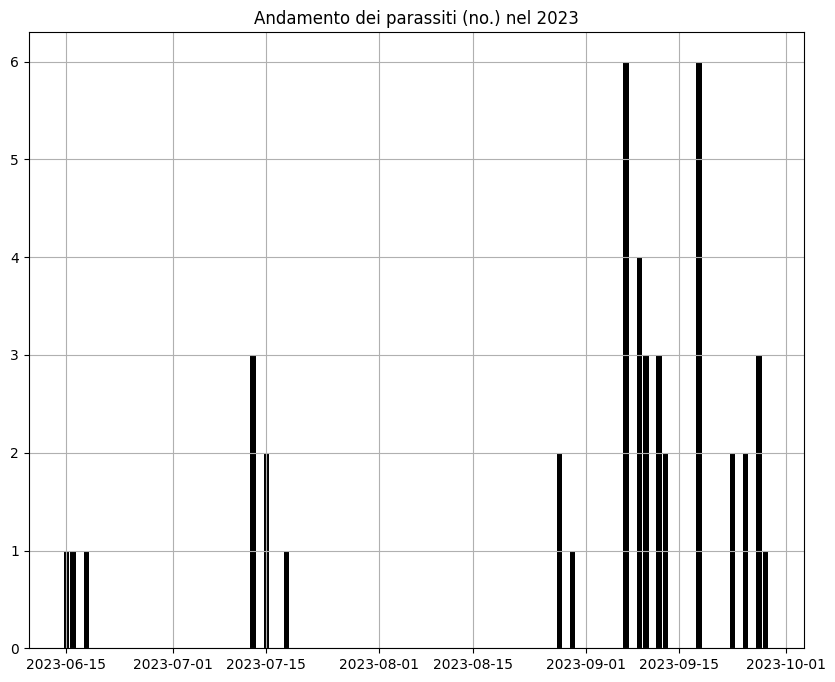

In [6]:
plt.figure(figsize=(10,8))
plt.bar(df_2023['Date'], df_2023['no. of Adult males'], color='k')
plt.grid(True)
plt.title('Andamento dei parassiti (no.) nel 2023')

# Data preprocessing

In [7]:
# Verifica della presenza di dati mancanti
print('Valori mancanti per dati 2022')
print((df_2022 == '?').sum())

print('\nValori mancanti per dati 2023')
print((df_2023 == '?').sum())

Valori mancanti per dati 2022
time                     0
temperature_mean         0
relativehumidity_mean    0
dtype: int64

Valori mancanti per dati 2023
Date                     0
no. of Adult males       0
temperature_mean         0
relativehumidity_mean    0
dtype: int64


In [8]:
# Scaling dei dati in modo che le colonne temperatura ed umidità abbiamo media nulla e varianza unitaria
df_2022_scaled = df_2022.drop('time', axis=1)

scaler_2022 = preprocessing.StandardScaler().fit(df_2022_scaled)
df_2022_scaled = pd.DataFrame(scaler_2022.transform(df_2022_scaled), columns=['temperatura', 'umidità'])

df_2023_scaled = df_2023.drop(['Date', 'no. of Adult males'], axis=1)

scaler_2023 = preprocessing.StandardScaler().fit(df_2023_scaled)
df_2023_scaled = pd.DataFrame(scaler_2023.transform(df_2023_scaled), columns=['temperatura', 'umidità'])

In [9]:
print('Dati anno 2022 normalizzati (media nulla e varianza unitaria)\n', df_2022_scaled.describe(), end='\n\n')
print('Dati anno 2023 (media nulla e varianza unitaria)\n', df_2023_scaled.describe())

Dati anno 2022 normalizzati (media nulla e varianza unitaria)
         temperatura       umidità
count  3.650000e+02  3.650000e+02
mean  -1.168015e-16 -1.265350e-16
std    1.001373e+00  1.001373e+00
min   -1.849038e+00 -2.253896e+00
25%   -8.659845e-01 -7.192987e-01
50%   -7.903897e-02 -1.594159e-02
75%    9.266422e-01  6.874155e-01
max    2.058034e+00  2.094130e+00

Dati anno 2023 (media nulla e varianza unitaria)
         temperatura       umidità
count  1.060000e+02  1.060000e+02
mean  -6.933657e-16  2.272815e-16
std    1.004751e+00  1.004751e+00
min   -2.928725e+00 -2.045443e+00
25%   -3.507267e-01 -7.608827e-01
50%    1.664726e-01  1.025106e-01
75%    6.083580e-01  6.500282e-01
max    1.971338e+00  2.587398e+00


In [10]:
X, y = df_2023_scaled.copy(), df_2023['no. of Adult males']

seed = 42

# Split dei dati in training set e test set
X_train, X_test, y_train, y_test  = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=True)

print(f'Dimensione del dataset di training {len(X_train)}')
print(f'Dimensione del dataset di test {len(X_test)}')

Dimensione del dataset di training 84
Dimensione del dataset di test 22


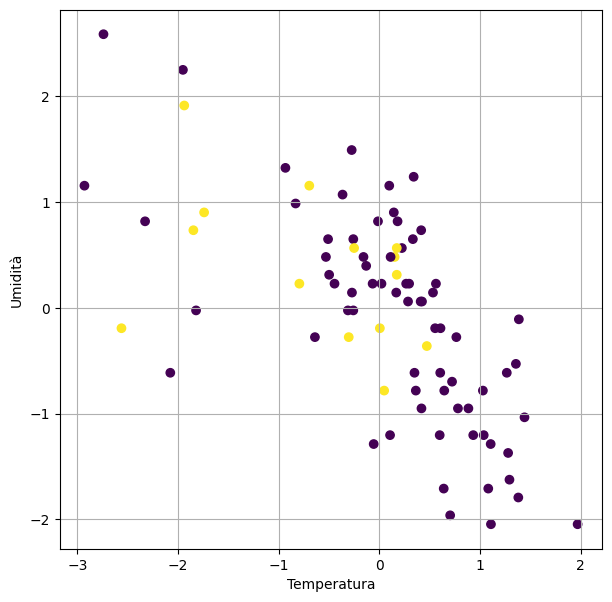

In [11]:
# Plot di (temperatura, umidità), il colore giallo indica che per quel punto, sono presenti parassiti, il colore viola indica che non sono presenti
plt.figure(figsize=(7, 7))

plt.scatter(x=X_train['temperatura'], y=X_train['umidità'], c=y_train>0)
plt.xlabel('Temperatura')
plt.ylabel('Umidità')
plt.grid(True)

# Decison Tree Regressor

result: -0.664935861623233


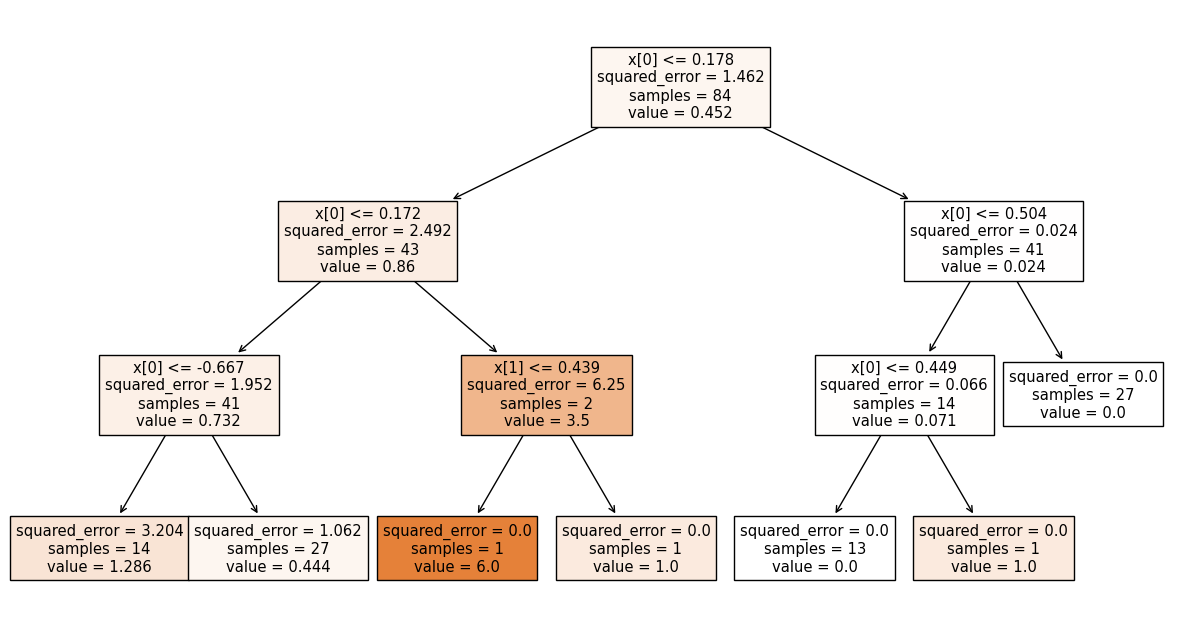

In [12]:
# Decision Tree Regressor per predirre il numero di parassiti basandosi sulle feature temperatura ed umidità
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

modeldt = DecisionTreeRegressor(max_depth=3)
modeldt.fit(X_train, y_train)

result = modeldt.score(X_test, y_test)
print(f'result: {result}')

plt.figure(figsize=(15,8))
output = tree.plot_tree(modeldt, filled=True)

# Time Series Analysis

([<matplotlib.axis.XTick at 0x7a03baf350c0>,
 [Text(19523.0, 0, '2023-06-15'),
  Text(19553.0, 0, '2023-07-15'),
  Text(19583.0, 0, '2023-08-14'),
  Text(19613.0, 0, '2023-09-13')])

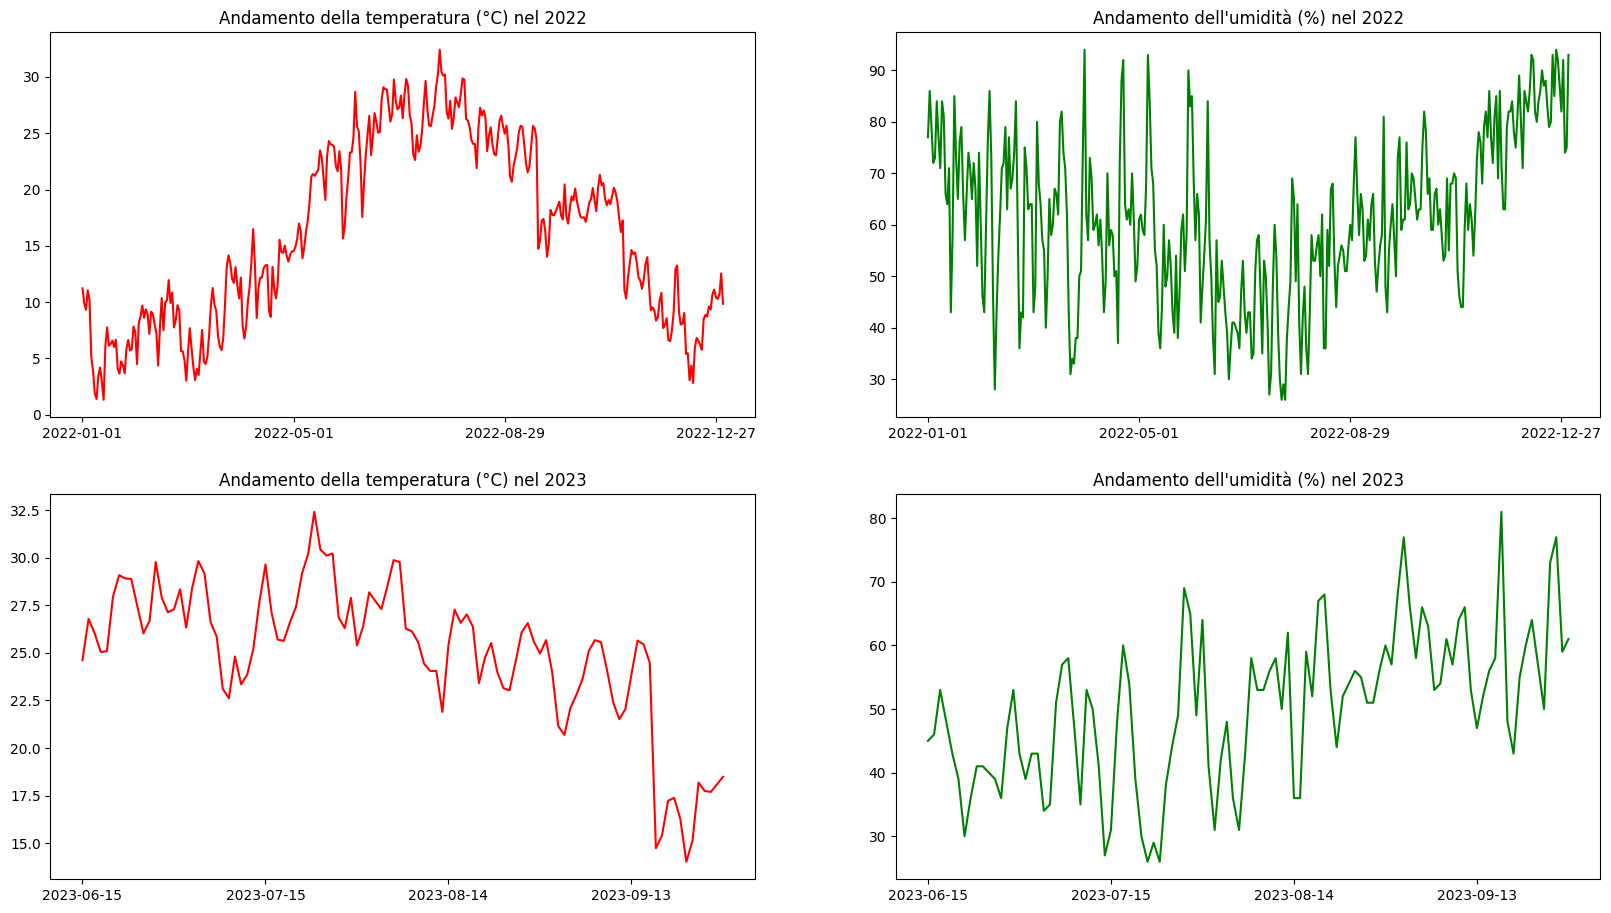

In [31]:
# Plot degli andamenti dei dati
plt.figure(figsize=(20, 11))

plt.subplot(221)
plt.plot(df_2022['time'], df_2022['temperature_mean'], color='r')
plt.title('Andamento della temperatura (°C) nel 2022')
plt.xticks(df_2022['time'][::120])

plt.subplot(222)
plt.plot(df_2022['time'], df_2022['relativehumidity_mean'], color='g')
plt.title('Andamento dell\'umidità (%) nel 2022')
plt.xticks(df_2022['time'][::120])

plt.subplot(223)
plt.plot(df_2023['Date'], df_2023['temperature_mean'], color='r')
plt.title('Andamento della temperatura (°C) nel 2023')
plt.xticks(df_2023['Date'][::30])

plt.subplot(224)
plt.plot(df_2023['Date'], df_2023['relativehumidity_mean'], color='g')
plt.title('Andamento dell\'umidità (%) nel 2023')
plt.xticks(df_2023['Date'][::30])

In [14]:
df_2022 = df_2022.set_index('time')
df_2023 = df_2023.set_index('Date')

## Temperatura

In [16]:
import itertools
import math
import statsmodels.api as sm

# modello SARIMAX per l'analisi delle serie temporali
# vengono esplorate varie scelte dei parametri p, d e q (grid search) ed infine viene selezionato il modello con AIC minore

p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

AIC = math.inf
for param in pdq:
  for param_seasonal in seasonal_pdq:
    model = sm.tsa.statespace.SARIMAX(df_2022['temperature_mean'],
                                      order=param,
                                      seasonal_order=param_seasonal,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
    results = model.fit()
    if results.aic < AIC:
      best = [param, param_seasonal]
      AIC = results.aic

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


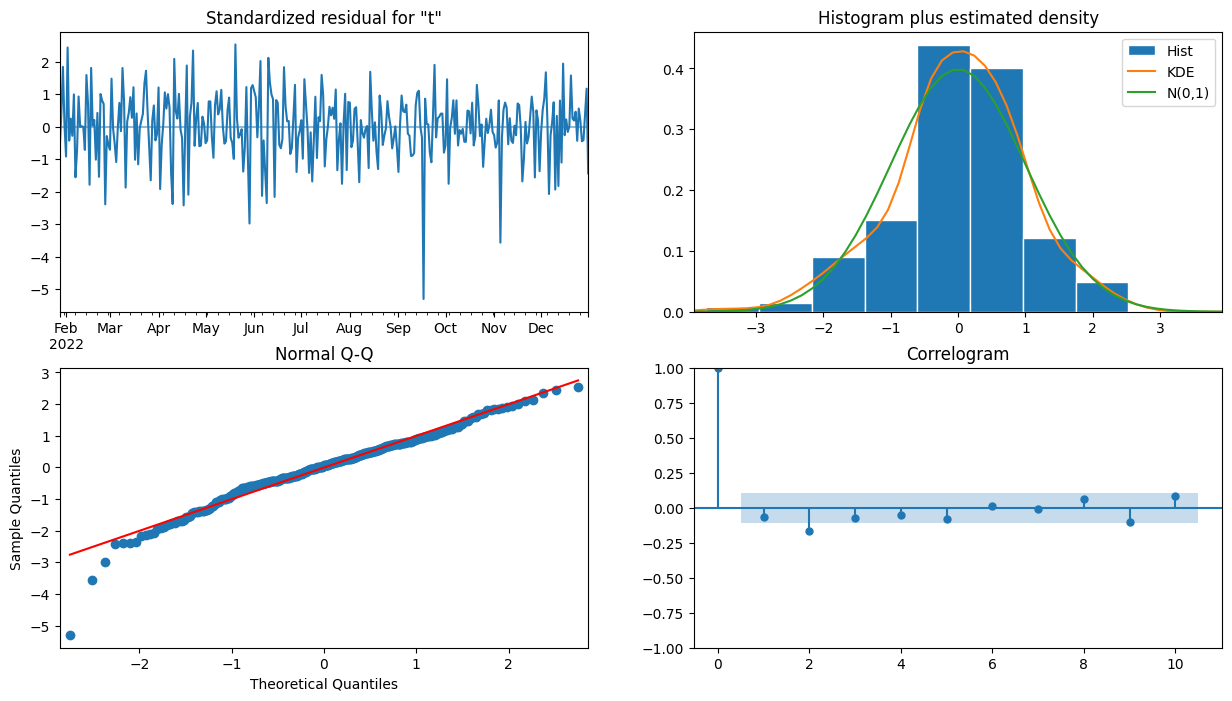

In [17]:
# Fit del modello con i parametri selezionati in precedenza
model = sm.tsa.statespace.SARIMAX(df_2022['temperature_mean'],
                                  order=best[0],
                                  seasonal_order=best[1],
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

results = model.fit()

output = results.plot_diagnostics(figsize=(15, 8))

In [18]:
# Previsioni ed intervalli di confidenza
start_date = '2022-05-01'
predictions = results.get_prediction(start=pd.to_datetime(start_date), dynamic=False)
predictions_ci = predictions.conf_int()

([<matplotlib.axis.XTick at 0x7a03bc8abbb0>,
 [Text(19113.0, 0, '2022-05-01'),
  Text(19173.0, 0, '2022-06-30'),
  Text(19233.0, 0, '2022-08-29'),
  Text(19293.0, 0, '2022-10-28'),
  Text(19353.0, 0, '2022-12-27')])

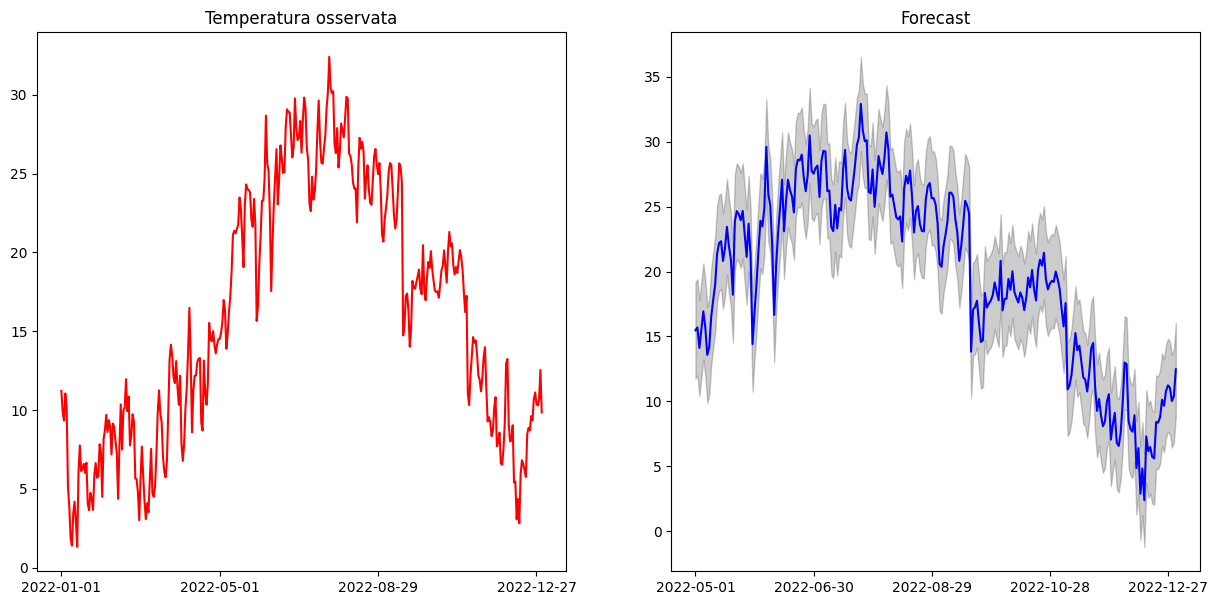

In [19]:
# Plot delle osservazioni e delle previsioni con i relativi intervalli di confidenza
plt.figure(figsize=(15,7))

plt.subplot(121)
plt.plot(df_2022.index, df_2022['temperature_mean'], color='r')
plt.title('Temperatura osservata')
plt.xticks(df_2022.index[::120])

ax = plt.subplot(122)
plt.plot(predictions.predicted_mean.index, predictions.predicted_mean, color='b')
ax.fill_between(predictions_ci.index,
                predictions_ci.iloc[:,0],
                predictions_ci.iloc[:,1],
                color='k', alpha=0.2)
plt.title('Forecast')
plt.xticks(predictions.predicted_mean.index[::60])

In [20]:
# Performance delle previsioni
from sklearn.metrics import mean_squared_error

temperatura_forecasted = predictions.predicted_mean
temperatura_osservata = df_2022['temperature_mean'][start_date:]

MSE = mean_squared_error(temperatura_osservata, temperatura_forecasted)

RMSE = MSE ** 0.5

print(f'Root Mean Squared Error: {RMSE:.2f}')

Root Mean Squared Error: 1.79


## Umidità

In [21]:
# modello SARIMAX per l'analisi delle serie temporali
# vengono esplorate varie scelte dei parametri p, d e q (grid search) ed infine viene selezionato il modello con AIC minore

p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

AIC = math.inf
for param in pdq:
  for param_seasonal in seasonal_pdq:
    model = sm.tsa.statespace.SARIMAX(df_2022['relativehumidity_mean'],
                                      order=param,
                                      seasonal_order=param_seasonal,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
    results = model.fit()
    if results.aic < AIC:
      best = [param, param_seasonal]
      AIC = results.aic

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


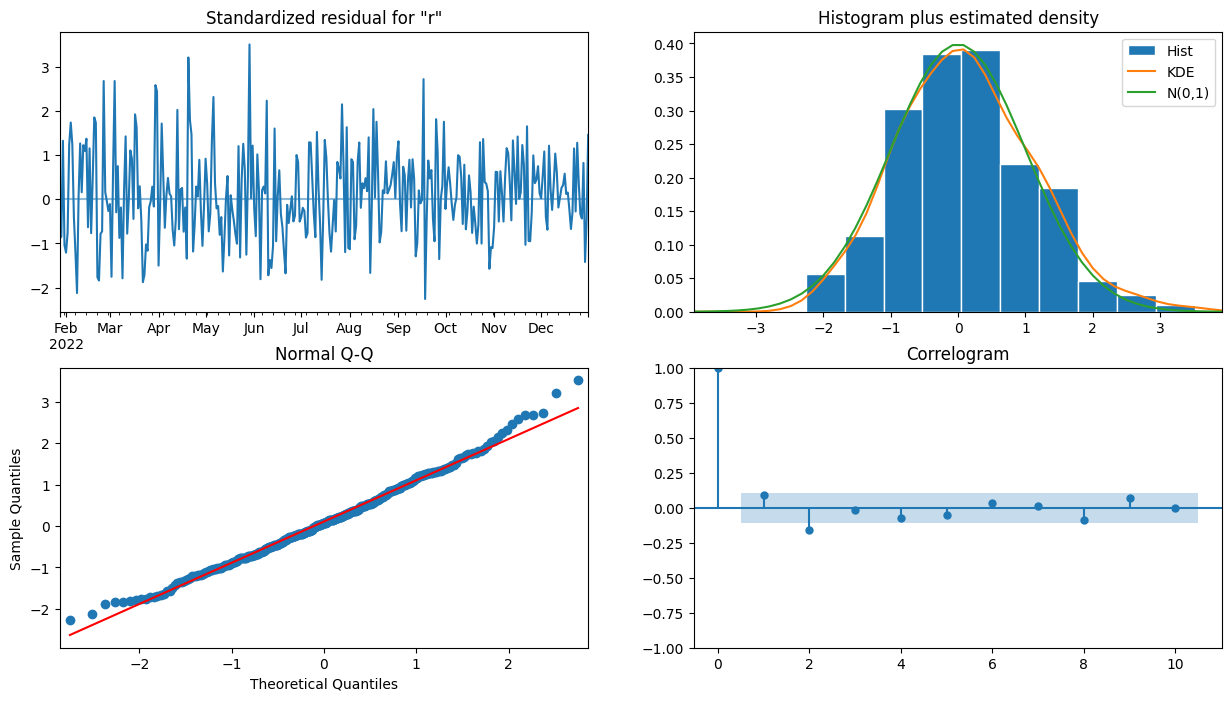

In [22]:
# Fit del modello con i parametri selezionati in precedenza

model = sm.tsa.statespace.SARIMAX(df_2022['relativehumidity_mean'],
                                  order=best[0],
                                  seasonal_order=best[1],
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

results = model.fit()

output = results.plot_diagnostics(figsize=(15, 8))

In [23]:
# Previsioni ed intervalli di confidenza
start_date = '2022-05-01'
predictions = results.get_prediction(start=pd.to_datetime(start_date), dynamic=False)
predictions_ci = predictions.conf_int()

(0.0, 100.0)

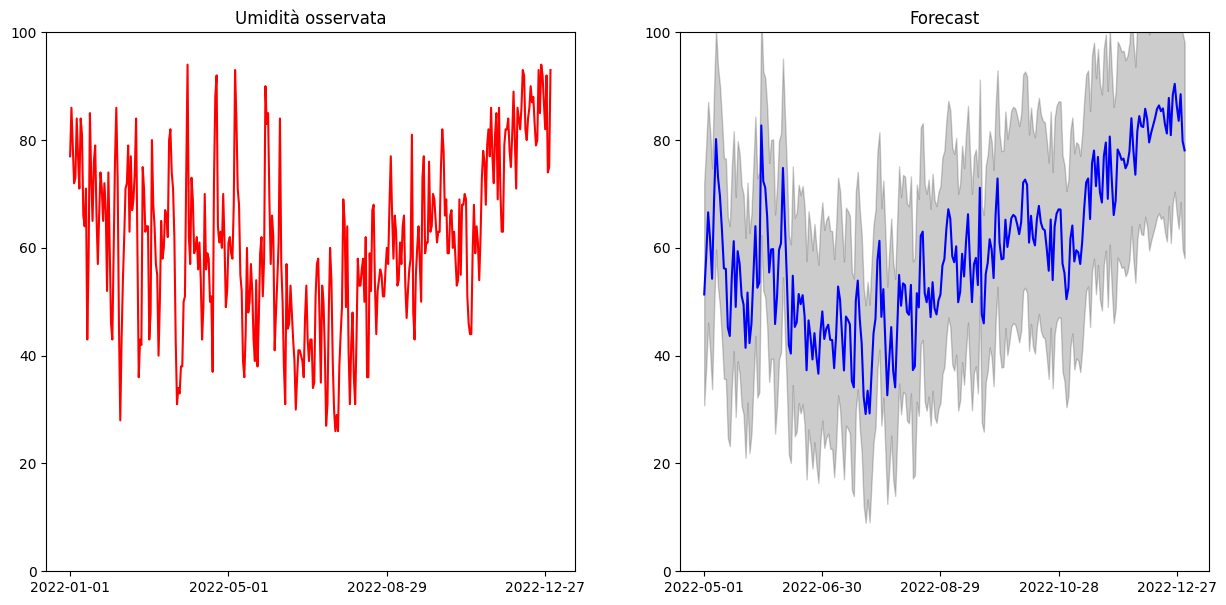

In [24]:
# Plot delle osservazioni e delle previsioni con i relativi intervalli di confidenza
plt.figure(figsize=(15,7))

plt.subplot(121)
plt.plot(df_2022.index, df_2022['relativehumidity_mean'], color='r')
plt.title('Umidità osservata')
plt.xticks(df_2022.index[::120])
plt.ylim([0, 100])

ax = plt.subplot(122)
plt.plot(predictions.predicted_mean.index, predictions.predicted_mean, color='b')
ax.fill_between(predictions_ci.index,
                predictions_ci.iloc[:,0],
                predictions_ci.iloc[:,1],
                color='k', alpha=0.2)
plt.title('Forecast')
plt.xticks(predictions.predicted_mean.index[::60])
plt.ylim([0, 100])


In [25]:
# Performance delle previsioni
umid_forecasted = predictions.predicted_mean
umid_osservata = df_2022['relativehumidity_mean'][start_date:]

MSE = mean_squared_error(umid_osservata, umid_forecasted)

RMSE = MSE ** 0.5

print(f'Root Mean Squared Error: {RMSE:.2f}')

Root Mean Squared Error: 9.43
